## Necessary Imports

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier
import pandas as pd
import csv
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

## Parkinsons Data Set

### Source

The dataset was created by Max Little of the University of Oxford, in collaboration with the National Centre for Voice and Speech, Denver, Colorado, who recorded the speech signals. The original study published the feature extraction methods for general voice disorders.

### Data Set Information

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

### Attribute Information

Matrix column entries (attributes):
<br>
name - ASCII subject name and recording number
<br>
MDVP:Fo(Hz) - Average vocal fundamental frequency
<br>
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
<br>
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
<br>
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
<br>
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
<br>
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
<br>
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
<br>
RPDE,D2 - Two nonlinear dynamical complexity measures
<br>
DFA - Signal fractal scaling exponent
<br>
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

### Features Type
All features are numeric.

## Read and store data

In [2]:
data = pd.read_csv('parkinsons.data')

In [3]:
print(data.shape[0])

195


In [4]:
print(data.shape[0], data.shape[1])

195 24


## Data Description

In [5]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


## Data visualization using histogram

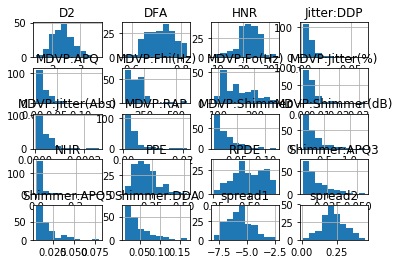

In [6]:
viz = data[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE']]
viz.hist()
plt.show()

Drop Name column as it is not useful in classification.

In [7]:
features = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE']
X = data.loc[:, features].values
y = data.loc[:,['status']].values
x = StandardScaler().fit_transform(X)

## Visualization using PCA

In [8]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf)

     principal component 1  principal component 2
0                 1.904785              -1.606964
1                 4.544182              -1.849394
2                 3.560883              -1.969380
3                 3.936254              -2.084825
4                 5.339941              -1.783302
..                     ...                    ...
190               0.192535               1.905458
191              -0.577888               2.062209
192               0.747520               2.514291
193              -0.749188               2.840314
194              -1.228448               1.898066

[195 rows x 2 columns]


In [9]:
finalDf = pd.concat([principalDf, data[['status']]], axis = 1)
print(finalDf)

     principal component 1  principal component 2  status
0                 1.904785              -1.606964       1
1                 4.544182              -1.849394       1
2                 3.560883              -1.969380       1
3                 3.936254              -2.084825       1
4                 5.339941              -1.783302       1
..                     ...                    ...     ...
190               0.192535               1.905458       0
191              -0.577888               2.062209       0
192               0.747520               2.514291       0
193              -0.749188               2.840314       0
194              -1.228448               1.898066       0

[195 rows x 3 columns]


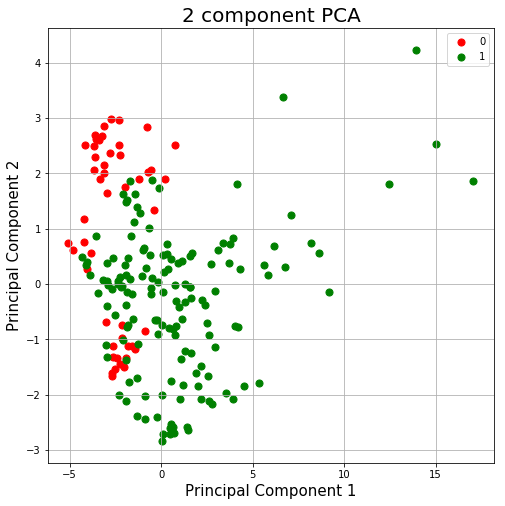

In [10]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['status'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [11]:
print(data)

               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:P

In [12]:
def compute_metrics(y_test, yhat):
    accuracy = accuracy_score(y_test, yhat)
    precision = precision_score(y_test, yhat, average='weighted', labels=np.unique(yhat))
    recall = recall_score(y_test, yhat, average='weighted')
    f1 = f1_score(y_test, yhat, average='weighted')
    
    metrics = {"accuracy": accuracy,
               "precision": precision,
               "recall": recall,
               "f1": f1}
    
    return metrics

In [13]:
def print_metrics(metrics, classifier):
    print(classifier + " Accuracy = " + str(metrics["accuracy"]))
    print(classifier + " Precision = " + str(metrics["precision"]))
    print(classifier + " Recall = " + str(metrics["recall"]))
    print(classifier + " F1_score = " + str(metrics["f1"]))

In [14]:
def svm_train(X, Y, c, kernel):
    svm_model = SVC(kernel = kernel, C = c).fit(X, Y.ravel())
    return svm_model

In [15]:
def decision_tree_train(X, Y, depth):
    dtree_model = DecisionTreeClassifier(max_depth = depth).fit(X, Y.ravel()) 
    return dtree_model

In [16]:
def neural_network_train(X, Y, alpha, hidden_layers, activation, solver, max_it):
    nn_model = MLPClassifier(alpha=alpha,
                    hidden_layer_sizes=hidden_layers, activation=activation,solver=solver, max_iter=max_it)
    nn_model = nn_model.fit(X, Y.ravel())
    return nn_model

In [17]:
def get_metrics_from_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    metrics = compute_metrics(y_test, predictions)
    return metrics

In [26]:
def preceptron_train(X, Y):
    preceptron_model = Perceptron(tol=1e-3)
    preceptron_model.fit(X, Y.ravel())
    return preceptron_model

In [21]:
def naiive_bayes_train(X, Y):
    gnb = GaussianNB()
    gnb.fit(X, Y.ravel())
    return gnb

In [22]:
def lda_train(X, Y):
    clf = LinearDiscriminantAnalysis()
    clf.fit(X, Y.ravel())
    return clf

## Trying different classifiers and computing their metrics

In [28]:
#partition dataset into  70% train 3o% test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 10)

#Linear SVM has high accuracy (the decision boundary is mostly linear)
svm_model_linear = svm_train(X_train, y_train, 0.1, 'linear')
svm_linear_metrics = get_metrics_from_model(svm_model_linear, X_test, y_test)
print_metrics(svm_linear_metrics, "Linear SVM")

#SVM with rbf has very low performance compared to other classifiers 70% accuracy
svm_model_rbf = svm_train(X_train, y_train, 0.1, 'rbf')
svm_rbf_metrics = get_metrics_from_model(svm_model_rbf, X_test, y_test)
print_metrics(svm_rbf_metrics, "RBF SVM")

#Decision Tree has poor performance 81% accuracy
dtree_model = decision_tree_train(X_train, y_train, 3)
dtree_metrics = get_metrics_from_model(dtree_model, X_test, y_test)
print_metrics(dtree_metrics, "Decision Tree")

#Preceptron 
preceptron = preceptron_train(X_train, y_train)
preceptron_metrics = get_metrics_from_model(preceptron, X_test, y_test)
print_metrics(preceptron_metrics, "Preceptron")

#Naiive Bayes
naiive_bayes = naiive_bayes_train(X_train, y_train)
naiive_bayes_metrics = get_metrics_from_model(naiive_bayes, X_test, y_test)
print_metrics(naiive_bayes_metrics, "Naiive Bayes")

#LDA
lda = lda_train(X_train, y_train)
lda_metrics = get_metrics_from_model(lda, X_test, y_test)
print_metrics(lda_metrics, "LDA")

#trying neural network with different hyper parameters
#Neural network can achieve best accuracy if hyper parameters were correct
#Accuracy reaches 95%
best_acc = 0
hidden_layer_sizes = [(5), (8), (24), (8,8), (8,8,8),(8,8,8,8), (24,24,24),(24,24,24,8),(24,24,24,24)]
alphas = [0.1, 0.01, 1, 2]
for size in hidden_layer_sizes:
    for alpha in alphas:
            nn_model = neural_network_train(X_train, y_train, alpha, size, "relu", "adam", 1500)
            nn_metrics = get_metrics_from_model(nn_model, X_test, y_test)
            print_metrics(nn_metrics, "Neural Network " + str(size))
            accuracy = nn_metrics["accuracy"]
            if accuracy > best_acc:
                 best_acc = accuracy
                 hyper_parameters = alpha, size
print(best_acc, hyper_parameters)

Linear SVM Accuracy = 0.9152542372881356
Linear SVM Precision = 0.9240819209039548
Linear SVM Recall = 0.9152542372881356
Linear SVM F1_score = 0.9097355877016894
RBF SVM Accuracy = 0.7288135593220338
RBF SVM Precision = 0.7288135593220338
RBF SVM Recall = 0.7288135593220338
RBF SVM F1_score = 0.614489863742107
Decision Tree Accuracy = 0.7966101694915254
Decision Tree Precision = 0.7966101694915254
Decision Tree Recall = 0.7966101694915254
Decision Tree F1_score = 0.7966101694915254
Preceptron Accuracy = 0.7288135593220338
Preceptron Precision = 0.7288135593220338
Preceptron Recall = 0.7288135593220338
Preceptron F1_score = 0.614489863742107
Naiive Bayes Accuracy = 0.7796610169491526
Naiive Bayes Precision = 0.8784336645236704
Naiive Bayes Recall = 0.7796610169491526
Naiive Bayes F1_score = 0.79186853442716
LDA Accuracy = 0.9322033898305084
LDA Precision = 0.9320419693301049
LDA Recall = 0.9322033898305084
LDA F1_score = 0.9307139188495119
Neural Network 5 Accuracy = 0.8305084745762712

c:\users\20111\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\20111\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\20111\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\20111\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: 

Neural Network 5 Accuracy = 0.7796610169491526
Neural Network 5 Precision = 0.7683460607189421
Neural Network 5 Recall = 0.7796610169491526
Neural Network 5 F1_score = 0.7469883256409262
Neural Network 8 Accuracy = 0.7457627118644068
Neural Network 8 Precision = 0.7274011299435028
Neural Network 8 Recall = 0.7457627118644068
Neural Network 8 F1_score = 0.6754791447030518
Neural Network 8 Accuracy = 0.7288135593220338
Neural Network 8 Precision = 0.7288135593220338
Neural Network 8 Recall = 0.7288135593220338
Neural Network 8 F1_score = 0.614489863742107


c:\users\20111\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Neural Network 8 Accuracy = 0.864406779661017
Neural Network 8 Precision = 0.8856763044200732
Neural Network 8 Recall = 0.864406779661017
Neural Network 8 F1_score = 0.8475778338742638
Neural Network 8 Accuracy = 0.6949152542372882
Neural Network 8 Precision = 0.6266922502931457
Neural Network 8 Recall = 0.6949152542372882
Neural Network 8 F1_score = 0.6414676425269644
Neural Network 24 Accuracy = 0.7288135593220338
Neural Network 24 Precision = 0.7288135593220338
Neural Network 24 Recall = 0.7288135593220338
Neural Network 24 F1_score = 0.614489863742107
Neural Network 24 Accuracy = 0.7288135593220338
Neural Network 24 Precision = 0.7288135593220338
Neural Network 24 Recall = 0.7288135593220338
Neural Network 24 F1_score = 0.614489863742107


c:\users\20111\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\20111\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Neural Network 24 Accuracy = 0.864406779661017
Neural Network 24 Precision = 0.8856763044200732
Neural Network 24 Recall = 0.864406779661017
Neural Network 24 F1_score = 0.8475778338742638
Neural Network 24 Accuracy = 0.8813559322033898
Neural Network 24 Precision = 0.8979661016949152
Neural Network 24 Recall = 0.8813559322033898
Neural Network 24 F1_score = 0.8692108620375433
Neural Network (8, 8) Accuracy = 0.2711864406779661
Neural Network (8, 8) Precision = 0.2711864406779661
Neural Network (8, 8) Recall = 0.2711864406779661
Neural Network (8, 8) F1_score = 0.11570621468926555


c:\users\20111\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Neural Network (8, 8) Accuracy = 0.9322033898305084
Neural Network (8, 8) Precision = 0.9320419693301049
Neural Network (8, 8) Recall = 0.9322033898305084
Neural Network (8, 8) F1_score = 0.9307139188495119
Neural Network (8, 8) Accuracy = 0.5254237288135594
Neural Network (8, 8) Precision = 0.5588005215123859
Neural Network (8, 8) Recall = 0.5254237288135594
Neural Network (8, 8) F1_score = 0.5402140462082587
Neural Network (8, 8) Accuracy = 0.7288135593220338
Neural Network (8, 8) Precision = 0.6726137377341659
Neural Network (8, 8) Recall = 0.7288135593220338
Neural Network (8, 8) F1_score = 0.6423352165725046


c:\users\20111\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neural Network (8, 8, 8) Accuracy = 0.847457627118644
Neural Network (8, 8, 8) Precision = 0.8423558755172609
Neural Network (8, 8, 8) Recall = 0.847457627118644
Neural Network (8, 8, 8) F1_score = 0.8421384432521885


c:\users\20111\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Neural Network (8, 8, 8) Accuracy = 0.7288135593220338
Neural Network (8, 8, 8) Precision = 0.7288135593220338
Neural Network (8, 8, 8) Recall = 0.7288135593220338
Neural Network (8, 8, 8) F1_score = 0.614489863742107
Neural Network (8, 8, 8) Accuracy = 0.8813559322033898
Neural Network (8, 8, 8) Precision = 0.8790601439827673
Neural Network (8, 8, 8) Recall = 0.8813559322033898
Neural Network (8, 8, 8) F1_score = 0.8772187891961467


c:\users\20111\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Neural Network (8, 8, 8) Accuracy = 0.7288135593220338
Neural Network (8, 8, 8) Precision = 0.7288135593220338
Neural Network (8, 8, 8) Recall = 0.7288135593220338
Neural Network (8, 8, 8) F1_score = 0.614489863742107
Neural Network (8, 8, 8, 8) Accuracy = 0.7796610169491526
Neural Network (8, 8, 8, 8) Precision = 0.7647342064714946
Neural Network (8, 8, 8, 8) Recall = 0.7796610169491526
Neural Network (8, 8, 8, 8) F1_score = 0.7653125280243925
Neural Network (8, 8, 8, 8) Accuracy = 0.7288135593220338
Neural Network (8, 8, 8, 8) Precision = 0.7288135593220338
Neural Network (8, 8, 8, 8) Recall = 0.7288135593220338
Neural Network (8, 8, 8, 8) F1_score = 0.614489863742107


c:\users\20111\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\20111\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neural Network (8, 8, 8, 8) Accuracy = 0.8305084745762712
Neural Network (8, 8, 8, 8) Precision = 0.8385007578889347
Neural Network (8, 8, 8, 8) Recall = 0.8305084745762712
Neural Network (8, 8, 8, 8) F1_score = 0.8334757631866306
Neural Network (8, 8, 8, 8) Accuracy = 0.9152542372881356
Neural Network (8, 8, 8, 8) Precision = 0.915764412448274
Neural Network (8, 8, 8, 8) Recall = 0.9152542372881356
Neural Network (8, 8, 8, 8) F1_score = 0.9122991351401046
Neural Network (24, 24, 24) Accuracy = 0.8305084745762712
Neural Network (24, 24, 24) Precision = 0.8305084745762712
Neural Network (24, 24, 24) Recall = 0.8305084745762712
Neural Network (24, 24, 24) F1_score = 0.8305084745762712
Neural Network (24, 24, 24) Accuracy = 0.7288135593220338
Neural Network (24, 24, 24) Precision = 0.7288135593220338
Neural Network (24, 24, 24) Recall = 0.7288135593220338
Neural Network (24, 24, 24) F1_score = 0.614489863742107


c:\users\20111\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Neural Network (24, 24, 24) Accuracy = 0.8813559322033898
Neural Network (24, 24, 24) Precision = 0.8841333143426863
Neural Network (24, 24, 24) Recall = 0.8813559322033898
Neural Network (24, 24, 24) F1_score = 0.882455663313091
Neural Network (24, 24, 24) Accuracy = 0.7288135593220338
Neural Network (24, 24, 24) Precision = 0.7288135593220338
Neural Network (24, 24, 24) Recall = 0.7288135593220338
Neural Network (24, 24, 24) F1_score = 0.614489863742107


c:\users\20111\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Neural Network (24, 24, 24, 8) Accuracy = 0.8983050847457628
Neural Network (24, 24, 24, 8) Precision = 0.8983050847457628
Neural Network (24, 24, 24, 8) Recall = 0.8983050847457628
Neural Network (24, 24, 24, 8) F1_score = 0.8983050847457628
Neural Network (24, 24, 24, 8) Accuracy = 0.7288135593220338
Neural Network (24, 24, 24, 8) Precision = 0.7288135593220338
Neural Network (24, 24, 24, 8) Recall = 0.7288135593220338
Neural Network (24, 24, 24, 8) F1_score = 0.614489863742107


c:\users\20111\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Neural Network (24, 24, 24, 8) Accuracy = 0.8813559322033898
Neural Network (24, 24, 24, 8) Precision = 0.8841333143426863
Neural Network (24, 24, 24, 8) Recall = 0.8813559322033898
Neural Network (24, 24, 24, 8) F1_score = 0.882455663313091
Neural Network (24, 24, 24, 8) Accuracy = 0.864406779661017
Neural Network (24, 24, 24, 8) Precision = 0.8856763044200732
Neural Network (24, 24, 24, 8) Recall = 0.864406779661017
Neural Network (24, 24, 24, 8) F1_score = 0.8475778338742638
Neural Network (24, 24, 24, 24) Accuracy = 0.7288135593220338
Neural Network (24, 24, 24, 24) Precision = 0.7288135593220338
Neural Network (24, 24, 24, 24) Recall = 0.7288135593220338
Neural Network (24, 24, 24, 24) F1_score = 0.614489863742107


c:\users\20111\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Neural Network (24, 24, 24, 24) Accuracy = 0.847457627118644
Neural Network (24, 24, 24, 24) Precision = 0.8423558755172609
Neural Network (24, 24, 24, 24) Recall = 0.847457627118644
Neural Network (24, 24, 24, 24) F1_score = 0.8421384432521885
Neural Network (24, 24, 24, 24) Accuracy = 0.7288135593220338
Neural Network (24, 24, 24, 24) Precision = 0.7288135593220338
Neural Network (24, 24, 24, 24) Recall = 0.7288135593220338
Neural Network (24, 24, 24, 24) F1_score = 0.614489863742107


c:\users\20111\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Neural Network (24, 24, 24, 24) Accuracy = 0.8305084745762712
Neural Network (24, 24, 24, 24) Precision = 0.8374875373878364
Neural Network (24, 24, 24, 24) Recall = 0.8305084745762712
Neural Network (24, 24, 24, 24) F1_score = 0.8094722923428297
0.9322033898305084 (0.01, (8, 8))
